# Analysis of Percentage of HS Students in a High School with Computer Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score

df = pd.read_csv('StatePoliciesWithDemographic2.csv')
print (df.head())

  StateAbbv   StateName P1_StatePlan P2_Standards P3_Funding P4_Certification  \
0        AK      Alaska           No          Yes         No               No   
1        AL     Alabama  In progress          Yes        Yes              Yes   
2        AR    Arkansas          Yes          Yes        Yes              Yes   
3        AZ     Arizona           No          Yes        Yes              Yes   
4        CA  California          Yes          Yes        Yes              Yes   

  P5_PreserviceIncentives P6_StateCSposition P7_RequireHStoOffer  \
0                      No                 No                  No   
1                     Yes                Yes                 Yes   
2                     Yes                Yes                 Yes   
3                      No        In Progress                  No   
4                      No                 No                  No   

     P8_CountGradReq  ... AP_Black  AP_HLLL  AP_Native  AP_HPI  AP_Asian  \
0  District Decision  ...   

In [2]:
df.dtypes

StateAbbv                   object
StateName                   object
P1_StatePlan                object
P2_Standards                object
P3_Funding                  object
P4_Certification            object
P5_PreserviceIncentives     object
P6_StateCSposition          object
P7_RequireHStoOffer         object
P8_CountGradReq             object
P9_HigherEdAdmission        object
PctReportedFCS             float64
YearOfLast                   int64
NumOfHS                      int64
NumHSWithCS                  int64
PctHSwFCS                  float64
TotalStudents                int64
NumStudentsinHSwCS           int64
PctStudentsHSwCS           float64
Total_Black                  int64
Total_HLLL                   int64
Total_Native                 int64
Total_HPI                    int64
Total_White                  int64
Total_Asian                  int64
Total_TwoPlus                int64
InCSHS_Black                 int64
InCSHS_HLLL                  int64
InCSHS_Native       

In [3]:
df['PctStudentsHSwCS_ZScore'] = stats.zscore(df['PctStudentsHSwCS'])

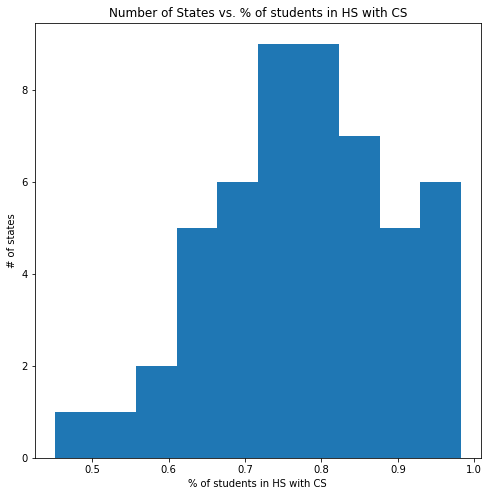

In [4]:
plt.figure(figsize=(8,8))
plt.hist(x=df['PctStudentsHSwCS'], bins=10)
plt.xlabel("% of students in HS with CS")
plt.ylabel("# of states")
plt.title("Number of States vs. % of students in HS with CS")
plt.show()

### Comparison of Pct of HS with FCS vs Pct of Student in HS with CS

In [5]:
d = np.polyfit(df['PctHSwFCS'],df['PctStudentsHSwCS'],1)
f = np.poly1d(d)
df['CalcRegressionA'] = f(df['PctHSwFCS'])
r2_hsfcs = r2_score(df['PctStudentsHSwCS'],df['CalcRegressionA'])
print ("Line of regression: " + str(f));
print ("R2: " + str(r2_hsfcs))

Line of regression:  
0.567 x + 0.4505
R2: 0.7156274641184077


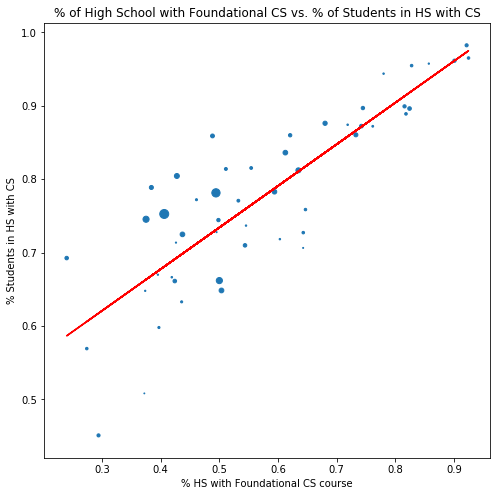

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(x=df['PctHSwFCS'], y=df['PctStudentsHSwCS'], s=df['TotalStudents']/25000)
plt.plot(df['PctHSwFCS'], df['CalcRegressionA'], c='r')
plt.xlabel('% HS with Foundational CS course')
plt.ylabel('% Students in HS with CS')
plt.title('% of High School with Foundational CS vs. % of Students in HS with CS')
plt.show()


### Enumerate policies

In [7]:
policies = ['P1_StatePlan','P2_Standards', 'P3_Funding', 'P4_Certification', 'P5_PreserviceIncentives', 'P6_StateCSposition', 'P7_RequireHStoOffer',
'P8_CountGradReq', 'P9_HigherEdAdmission']
policiesB = ["B" + p for p in policies]

print (policiesB)


['BP1_StatePlan', 'BP2_Standards', 'BP3_Funding', 'BP4_Certification', 'BP5_PreserviceIncentives', 'BP6_StateCSposition', 'BP7_RequireHStoOffer', 'BP8_CountGradReq', 'BP9_HigherEdAdmission']


In [8]:
def makeBinary(yesno):
    if (yesno.upper() == 'YES'):
        return 1
    else:
        return 0

In [9]:
for i in range(len(policies)):
    df[policiesB[i]] = df[policies[i]].apply(lambda x:makeBinary(x))

In [10]:
df['NumPolicies']=df[policiesB].sum(axis=1)

In [11]:
df.describe()

,PctReportedFCS,YearOfLast,NumOfHS,NumHSWithCS,PctHSwFCS,TotalStudents,NumStudentsinHSwCS,PctStudentsHSwCS,Total_Black,Total_HLLL,...,BP1_StatePlan,BP2_Standards,BP3_Funding,BP4_Certification,BP5_PreserviceIncentives,BP6_StateCSposition,BP7_RequireHStoOffer,BP8_CountGradReq,BP9_HigherEdAdmission,NumPolicies
count,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,51.000000,51.000000,5.100000e+01,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.572941,20.647059,516.196078,264.784314,0.573646,3.264598e+05,2.536473e+05,0.775800,48364.607843,8.620975e+04,...,0.411765,0.764706,0.588235,0.803922,0.411765,0.607843,0.450980,0.705882,0.411765,5.156863
std,0.178519,0.522438,510.772357,223.091758,0.179145,3.826195e+05,2.908326e+05,0.120076,56982.990484,1.952780e+05,...,0.497050,0.428403,0.497050,0.400979,0.497050,0.493089,0.502543,0.460179,0.497050,2.444361
min,0.240000,19.000000,43.000000,16.000000,0.239677,2.082600e+04,1.058000e+04,0.450771,289.000000,5.950000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.430000,20.000000,209.500000,102.000000,0.426800,9.273900e+04,6.911850e+04,0.708004,3966.000000,9.990500e+03,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.540000,21.000000,353.000000,227.000000,0.543735,2.413940e+05,1.743340e+05,0.771938,23651.000000,3.183000e+04,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,6.000000
75%,0.725000,21.000000,636.000000,332.500000,0.725754,3.881930e+05,3.207130e+05,0.872100,81556.500000,6.679200e+04,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,0.920000,21.000000,2633.000000,1069.000000,0.924837,2.013095e+06,1.514876e+06,0.982347,211916.000000,1.087392e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [12]:
d = np.polyfit(df['NumPolicies'],df['PctStudentsHSwCS'],1)
f = np.poly1d(d)
df['CalcRegressionB'] = f(df['NumPolicies'])
r2_policies = r2_score(df['PctStudentsHSwCS'],df['CalcRegressionB'])
print ("Line of regression: " + str(f));
print ("R2: " + str(r2_policies))

Line of regression:  
0.02813 x + 0.6307
R2: 0.32793698769908686


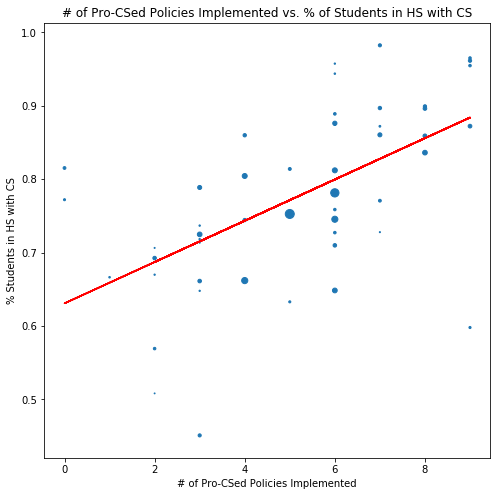

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(x=df['NumPolicies'], y=df['PctStudentsHSwCS'], s=df['TotalStudents']/25000)
plt.plot(df['NumPolicies'], df['CalcRegressionB'], c='r')
plt.xlabel('# of Pro-CSed Policies Implemented')
plt.ylabel('% Students in HS with CS')
plt.title('# of Pro-CSed Policies Implemented vs. % of Students in HS with CS')
plt.show()


In [14]:
polWresults = policiesB + ['NumPolicies','PctStudentsHSwCS']
corrWresults =df[polWresults].corr()

In [15]:
print (corrWresults)

                          BP1_StatePlan  BP2_Standards  BP3_Funding  \
BP1_StatePlan                  1.000000       0.276247     0.295238   
BP2_Standards                  0.276247       1.000000     0.287297   
BP3_Funding                    0.295238       0.287297     1.000000   
BP4_Certification              0.212501       0.308190     0.289238   
BP5_PreserviceIncentives       0.190476       0.182323     0.214286   
BP6_StateCSposition            0.427214       0.311882     0.307210   
BP7_RequireHStoOffer           0.282592       0.224047     0.197814   
BP8_CountGradReq               0.190307       0.149191     0.159447   
BP9_HigherEdAdmission          0.109524      -0.005525     0.295238   
NumPolicies                    0.587766       0.513427     0.597449   
PctStudentsHSwCS               0.400437       0.347717     0.369306   

                          BP4_Certification  BP5_PreserviceIncentives  \
BP1_StatePlan                      0.212501                  0.190476   
B

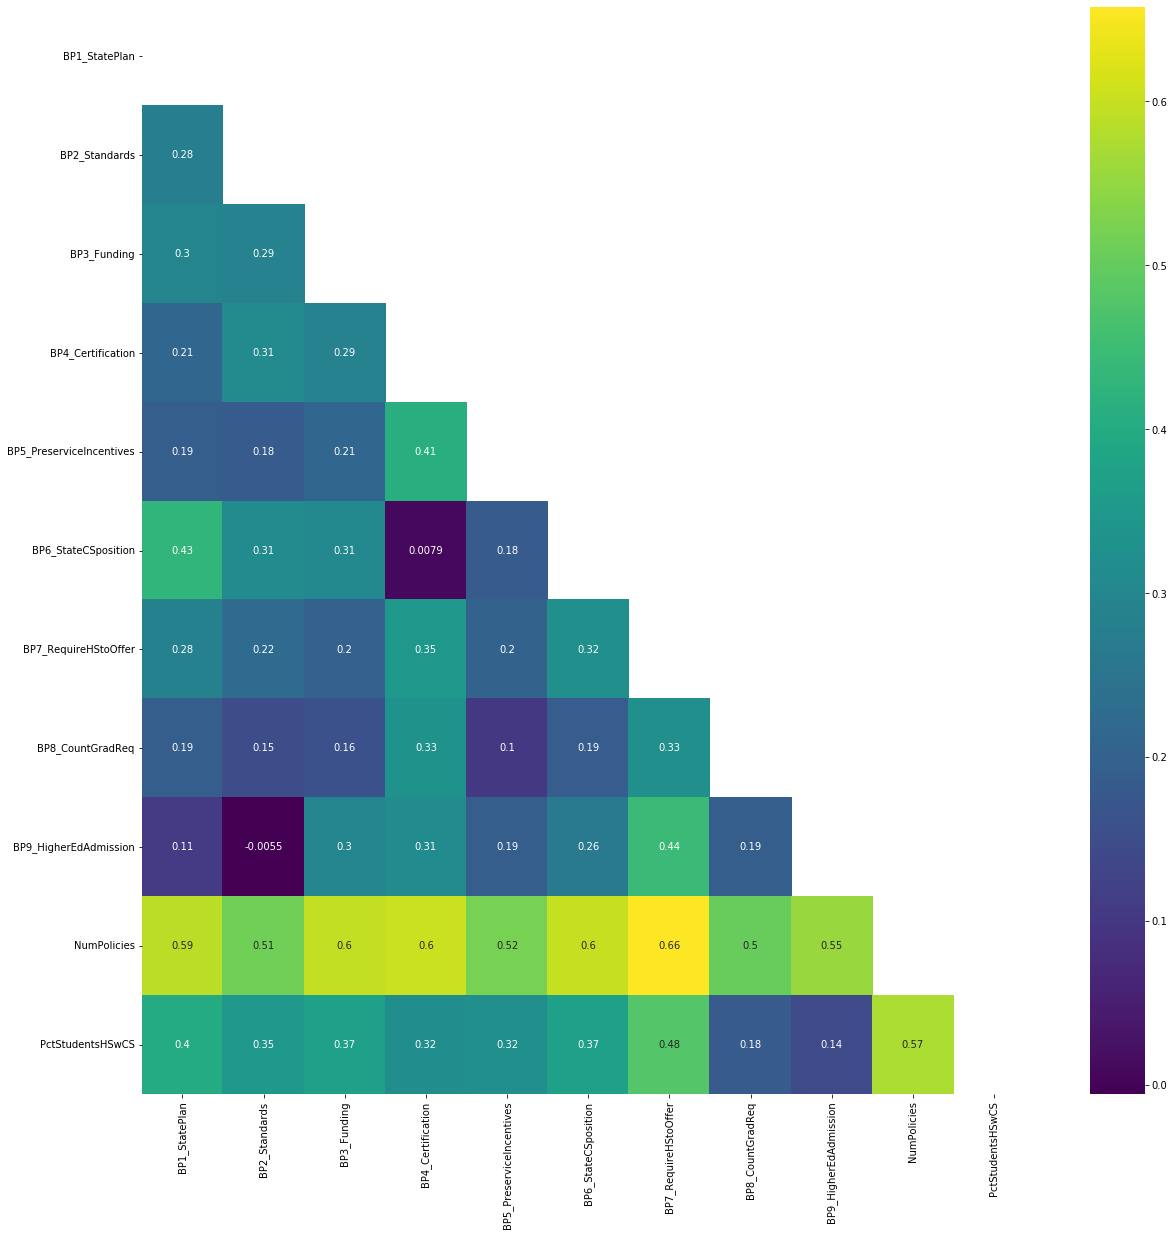

In [16]:
mask = np.zeros_like(corrWresults)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(corrWresults, mask=mask,  annot=True, cmap="viridis")


In [17]:
# Find total aggregations for % Students in HS with CS
aggdf = df.agg({'StateAbbv':'count','PctStudentsHSwCS':'mean', 'TotalStudents':'sum', 'NumStudentsinHSwCS': 'sum' })
PctStudentsHSwCS_StAvg = aggdf['PctStudentsHSwCS']
PctStudentsHSwCS_StDev = np.std(df['PctStudentsHSwCS'])
PctStudentsHSwCS_WtAvg = aggdf['NumStudentsinHSwCS']/aggdf['TotalStudents']
print("% of Students in HS with CS - State Average: " + str(PctStudentsHSwCS_StAvg))
print("% of Students in HS with CS - Standard Deviation: " + str(PctStudentsHSwCS_StDev))
print("% of Students in HS with CS - National Average: " + str(PctStudentsHSwCS_WtAvg))

% of Students in HS with CS - State Average: 0.775799612647059
% of Students in HS with CS - Standard Deviation: 0.11889344402921877
% of Students in HS with CS - National Average: 0.7769633831748196


In [18]:
def agg_policy(policy_binary):
    aggdf = df.groupby(policy_binary).agg({'StateAbbv':'count','PctStudentsHSwCS':'mean', 'TotalStudents':'sum', 'NumStudentsinHSwCS': 'sum' })
    row0 =  aggdf.loc[0]
    row1 =  aggdf.loc[1]
    ret_row = {'Policy': policy_binary[1:]}
    ret_row.update({'Cnt0':row0['StateAbbv'],'Cnt1':row1['StateAbbv'],'StAvg0':row0['PctStudentsHSwCS'],'StAvg1':row1['PctStudentsHSwCS']})
    ret_row.update({'WStAvg0': row0['NumStudentsinHSwCS'] / row0['TotalStudents'], 'WStAvg1': row1['NumStudentsinHSwCS'] / row1['TotalStudents'] })
    return ret_row
    
    

In [19]:
policy_agg = pd.DataFrame(columns=['Policy','Cnt0','Cnt1','StAvg0','StAvg1','WStAvg0','WStAvg1'])
policy_agg = pd.DataFrame()
for polB in policiesB:
    policy_agg = policy_agg.append(agg_policy(polB),ignore_index=True)
policy_agg.set_index('Policy')
policy_agg['PctImplemented'] = policy_agg['Cnt1']/(policy_agg['Cnt1'] + policy_agg['Cnt0'])
policy_agg['StAvgDiff'] = policy_agg['StAvg1'] - policy_agg['StAvg0']
policy_agg['WStAvgDiff'] = policy_agg['WStAvg1'] - policy_agg['WStAvg0']
policy_agg['StAvgDiffPct'] = policy_agg['StAvgDiff']/PctStudentsHSwCS_StAvg
policy_agg['WStAvgDiffPct'] = policy_agg['WStAvgDiff']/PctStudentsHSwCS_WtAvg
print (policy_agg)
                                                   

   Cnt0  Cnt1                   Policy    StAvg0    StAvg1   WStAvg0  \
0  30.0  21.0             P1_StatePlan  0.735967  0.832704  0.754620   
1  12.0  39.0             P2_Standards  0.701271  0.798732  0.754262   
2  21.0  30.0               P3_Funding  0.723319  0.812536  0.726886   
3  10.0  41.0         P4_Certification  0.698824  0.794574  0.700623   
4  30.0  21.0  P5_PreserviceIncentives  0.743590  0.821813  0.754786   
5  20.0  31.0       P6_StateCSposition  0.721145  0.811060  0.752376   
6  28.0  23.0      P7_RequireHStoOffer  0.723986  0.838877  0.737032   
7  15.0  36.0          P8_CountGradReq  0.742144  0.789823  0.735041   
8  30.0  21.0     P9_HigherEdAdmission  0.761536  0.796176  0.766049   

    WStAvg1  PctImplemented  StAvgDiff  WStAvgDiff  StAvgDiffPct  \
0  0.813644        0.411765   0.096737    0.059024      0.124693   
1  0.784620        0.764706   0.097461    0.030358      0.125626   
2  0.791835        0.588235   0.089216    0.064949      0.114999   
3  0.78

<Figure size 3600x2880 with 0 Axes>

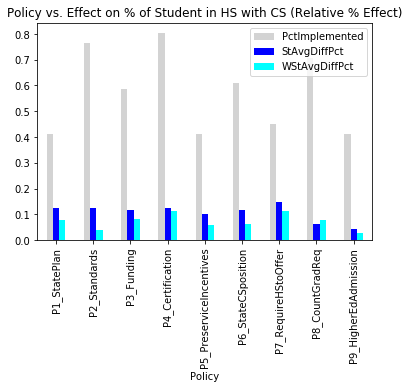

In [20]:
plt.figure(figsize=(50,40))
policy_agg_chart = policy_agg[['Policy','PctImplemented','StAvgDiffPct','WStAvgDiffPct']]
policy_agg_chart.plot(kind='bar', x='Policy', color=['lightgrey', 'blue', 'cyan'])
plt.title("Policy vs. Effect on % of Student in HS with CS (Relative % Effect)")
plt.show()

<Figure size 3600x2880 with 0 Axes>

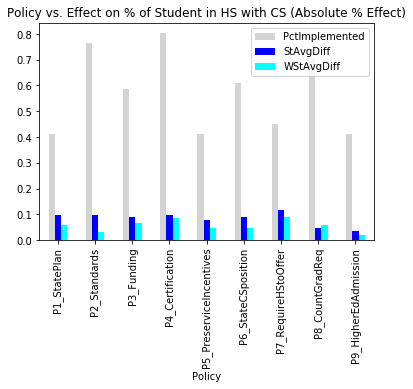

In [22]:
plt.figure(figsize=(50,40))
policy_agg_chart = policy_agg[['Policy','PctImplemented','StAvgDiff','WStAvgDiff']]
policy_agg_chart.plot(kind='bar', x='Policy', color=['lightgrey', 'blue', 'cyan'])
plt.title("Policy vs. Effect on % of Student in HS with CS (Absolute % Effect)")
plt.show()

In [21]:
print (df[['StateName','NumPolicies', 'TotalStudents','PctStudentsHSwCS', 'PctStudentsHSwCS_ZScore']].sort_values('PctStudentsHSwCS',ascending=False))

               StateName  NumPolicies  TotalStudents  PctStudentsHSwCS  \
40        South Carolina            7         241394          0.982347   
2               Arkansas            9         159278          0.965042   
20              Maryland            9         270650          0.961367   
39          Rhode Island            6          44343          0.957401   
33                Nevada            9         161249          0.954681   
30         New Hampshire            6          55167          0.943727   
1                Alabama            8         262216          0.899145   
44                  Utah            7         287198          0.896870   
19         Massachusetts            8         327368          0.896196   
6            Connecticut            6         169150          0.888917   
31            New Jersey            6         449520          0.876095   
11                Hawaii            6          59099          0.874097   
15               Indiana            9 